In [1]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
###
from google.colab import drive
import spacy
import gensim
import pandas as pd
spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
sheet_id = "12V2euXZRC9uSeRyWUZNSV8A2LBfGSbSUpfTo6hdkMBU"
sheet_name = "spacenews"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
DataSet = pd.read_csv(url)
DataSet


,title,content
0,Astrocast buying Hiber to boost funding and ex...,"TAMPA, Fla. — Cash-strapped smallsat operator ..."
1,Sierra Space to partner with Spirit AeroSystem...,WASHINGTON — Sierra Space announced May 31 a s...
2,Rocket to launch China’s next space station mo...,HELSINKI — A Long March 5B rocket has arrived ...
3,Against Quad? China launches satellite-based E...,"SEOUL, South Korea — In what appears to be a t..."
4,House committee questions proposed delay in NA...,WASHINGTON — Members of the House Science Comm...
...,...,...
17469,Kendall lays out Pentagon thinking on future s...,"\nFrank Kendall, the Pentagon’s top acquisitio..."
17470,A larger share of NOAA’s declining space budge...,Updated Feb. 10 at 10:18 p.m. Eastern The U.S....
17471,Think Tank Turns Its Attention To Mars As 2016...,WASHINGTON — As NASA develops a long-term stra...
17472,House Bill Leaves Last Three JPSS Satellites i...,WASHINGTON — A spending bill the House passed ...


In [3]:
DataSet = DataSet.dropna()
documents = DataSet['content'].values.tolist()


In [4]:
# Do rocha
new_docs = []
for i,doc in enumerate(documents[:100]):
    print(f"Doc: {i}")
    # cleaning

    clean = " ".join(word for word in gensim.utils.simple_preprocess(doc, min_len = 4))
    
    # removing stops and digits
    tdoc=nlp(clean)
    stops_and_digits_removed  = " ".join(token.text for token in tdoc if not token.is_stop and not token.is_digit)

    # lemmatization
    new_doc = " ".join(token.lemma_ for token in tdoc)

    new_docs.append(new_doc)



Doc: 0
Doc: 1
Doc: 2
Doc: 3
Doc: 4
Doc: 5
Doc: 6
Doc: 7
Doc: 8
Doc: 9
Doc: 10
Doc: 11
Doc: 12
Doc: 13
Doc: 14
Doc: 15
Doc: 16
Doc: 17
Doc: 18
Doc: 19
Doc: 20
Doc: 21
Doc: 22
Doc: 23
Doc: 24
Doc: 25
Doc: 26
Doc: 27
Doc: 28
Doc: 29
Doc: 30
Doc: 31
Doc: 32
Doc: 33
Doc: 34
Doc: 35
Doc: 36
Doc: 37
Doc: 38
Doc: 39
Doc: 40
Doc: 41
Doc: 42
Doc: 43
Doc: 44
Doc: 45
Doc: 46
Doc: 47
Doc: 48
Doc: 49
Doc: 50
Doc: 51
Doc: 52
Doc: 53
Doc: 54
Doc: 55
Doc: 56
Doc: 57
Doc: 58
Doc: 59
Doc: 60
Doc: 61
Doc: 62
Doc: 63
Doc: 64
Doc: 65
Doc: 66
Doc: 67
Doc: 68
Doc: 69
Doc: 70
Doc: 71
Doc: 72
Doc: 73
Doc: 74
Doc: 75
Doc: 76
Doc: 77
Doc: 78
Doc: 79
Doc: 80
Doc: 81
Doc: 82
Doc: 83
Doc: 84
Doc: 85
Doc: 86
Doc: 87
Doc: 88
Doc: 89
Doc: 90
Doc: 91
Doc: 92
Doc: 93
Doc: 94
Doc: 95
Doc: 96
Doc: 97
Doc: 98
Doc: 99


In [5]:

documents[0]

'TAMPA, Fla. — Cash-strapped smallsat operator Astrocast announced plans May 30 to buy Dutch connectivity solutions provider Hiber, which scrapped plans for its own constellation last year following failures on its initial satellites.  Switzerland-based Astrocast said the deal would give it spectrum in the Americas to enable its growing constellation for connecting Internet of Things (IoT) devices to operate globally. Astrocast plans to issue new shares to fund the acquisition. Hiber has also agreed to invest around $11 million in Astrocast’s second stock market listing later this year to help the Swiss startup meet near-term funding needs.  Astrocast hopes to raise 60-80 million euros ($64-86 million) by listing shares on the Euronext Growth Paris junior stock market in France. The startup said it needs more funds to expand its constellation of 12 satellites — including two test spacecraft — to 20 before the end of 2022, and to 40 in 2023 to improve coverage.  By 2025, Astrocast aims 

In [6]:
new_docs[0]

'tampa cash strapped smallsat operator astrocast announce plan dutch connectivity solution provider hiber which scrap plan constellation last year follow failure initial satellite switzerland base astrocast say deal would give spectrum americas enable grow constellation connect internet thing device operate globally astrocast plan issue share fund acquisition hiber also agree invest around million astrocast second stock market list later this year help swiss startup meet near term funding needs astrocast hope raise million euro million listing share euronext growth paris junior stock market france startup say need more fund expand constellation satellite include test spacecraft before improve coverage astrocast aim operate satellite earth orbit while first will three unit cubesats astrocast say later model could large unit cubesat astrocast become public company august when raise about million list share euronext growth oslo norway operator launch commercially february region outside a

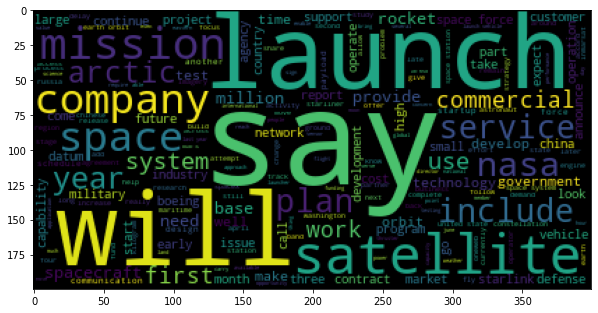

In [7]:
import matplotlib.pyplot as plt
import wordcloud as wc
colls= ''
tokens = []
for i, thing in enumerate(new_docs):
    tokens.append(thing.split(" "))


for d in tokens:
    collect = " ".join([w for w in d])
    colls = colls + " "+collect
colls

myCloud = wc.WordCloud().generate(colls)
plt.figure(figsize=(10,10))
plt.imshow(myCloud)

In [8]:
revlemma=[]
len_raw=[]
print('Building lemmas...')
for i,d in enumerate(documents[:100]):
  print(i,end='')
  len_raw.append(len(d))
  tdoc=nlp(d)
  # lm=" ".join([token.lemma_ for token in tdoc  if not(token.is_stop == True or token.is_punct == True or '_' in token.lemma_)])
  lm=" ".join([token.lemma_ for token in tdoc  if token.lemma_ != '-PRON-' and token.pos_ in ['NOUN','PROPN'] and token.is_stop == False and token.is_digit == False])
  revlemma.append(lm)
  print('\r\r\r\r\r\r\r\r',end='')
len_lemma=[len(d) for d in revlemma]
print('# of words (raw,pre): (%d,%d)'%(sum(len_raw),sum(len_lemma)))
print('Average # of words (raw,pre): (%.2f,%.2f)'%(sum(len_raw)/len(len_raw),sum(len_lemma)/len(len_lemma)))

Building lemmas...
# of words (raw,pre): (374116,163048)
Average # of words (raw,pre): (3741.16,1630.48)


In [9]:
documents[1]

'WASHINGTON — Sierra Space announced May 31 a strategic partnership with aerospace manufacturer Spirit AeroSystems for production of cargo modules for its Dream Chaser vehicles. The companies said they signed a letter of intent under which Spirit will assist in the development and production of Shooting Star, the cargo module attached to the aft end of the Dream Chaser lifting body vehicle. That module will support future cargo missions to the International Space Station under Sierra Space’s contract with NASA, and for other applications. Shooting Star can carry about 4,500 kilograms of pressurized and unpressurized cargo, and also has solar panels and thrusters. While the Dream Chaser itself returns to Earth to fly additional missions, the Shooting Star module is jettisoned before reentry and burns up in the atmosphere, meaning a new module is needed for each mission. Sierra Space built the first Shooting Star module on its own, but suggested in the statement that partnering with Spir

In [10]:
revlemma[1]

'WASHINGTON Sierra Space partnership aerospace manufacturer Spirit AeroSystems production cargo module Dream Chaser vehicle company letter intent Spirit development production Shooting Star cargo module aft end Dream Chaser body vehicle module cargo mission International Space Station Sierra Space contract NASA application Star kilogram cargo panel thruster Dream Chaser Earth mission Shooting Star module reentry atmosphere module mission Sierra Space Shooting Star module statement Spirit company aircraft structure cost module Shooting Star solution Sierra Space space economy Spirit partner accessibility offering efficiency adoption Tom Vice executive Sierra Space statement Spirit AeroSystems value term design manufacturability industrialization production rate Dream Chaser derivative Tom Gentile president executive Spirit AeroSystems statement Gentile Sen. Jerry Moran R Kan. Senate Commerce Committee appropriation subcommittee NASA company Spirit Wichita Kansas Shooting Star cargo modu

In [11]:
print('Tokenization')
dtoken=[gensim.utils.simple_preprocess(d, deacc= True, min_len=3) for d in revlemma] 
print('Building bigrams')
from gensim.models.phrases import Phrases, Phraser
phrases  = Phrases(dtoken, min_count = 2,threshold=9)
bigram=Phraser(phrases)
bdocs=[bigram[d] for d in dtoken]

Tokenization
Building bigrams


In [12]:
dictionary=Dictionary(bdocs)
print(dictionary)
dictionary.filter_extremes(keep_n = 10000, no_above= 0.9, no_below = len(bdocs)*.01) # no_below 1%
print(dictionary)
corpus_bof=[dictionary.doc2bow(d) for d in bdocs]
tfidf = TfidfModel(corpus_bof)
corpus_tfidf = tfidf[corpus_bof]

Dictionary(3438 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'americas']...)
Dictionary(3438 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'americas']...)


#Bag of words

In [13]:
K=[10,20,30,40]
alpha=['symmetric','asymmetric','auto']
eta=['symmetric','auto']
passes=[50,100,200]
cv=[]
vocab = list(dictionary.values())
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))
for k in K:
  for a in alpha:
    for b in eta:
      for p in passes:
        lda = LdaModel(corpus = corpus_bof,num_topics= k, random_state= 27644437, id2word = dictionary, alpha = a, eta=b,per_word_topics = True,passes = p)
        lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
        cv_cohe=lda_cv.get_coherence()
        print('K: %2d alfa: %10s beta: %10s passes: %3d coherence: %.3f'%(k,a,b,p,cv_cohe))
        cv.append(cv_cohe)

# of docs:   100 # of words:   3438
K: 10 alfa:  symmetric beta:  symmetric passes:  50 coherence: 0.374
K: 10 alfa:  symmetric beta:  symmetric passes: 100 coherence: 0.378
K: 10 alfa:  symmetric beta:  symmetric passes: 200 coherence: 0.379
K: 10 alfa:  symmetric beta:       auto passes:  50 coherence: 0.286
K: 10 alfa:  symmetric beta:       auto passes: 100 coherence: 0.286
K: 10 alfa:  symmetric beta:       auto passes: 200 coherence: 0.287
K: 10 alfa: asymmetric beta:  symmetric passes:  50 coherence: 0.375
K: 10 alfa: asymmetric beta:  symmetric passes: 100 coherence: 0.372
K: 10 alfa: asymmetric beta:  symmetric passes: 200 coherence: 0.379
K: 10 alfa: asymmetric beta:       auto passes:  50 coherence: 0.296
K: 10 alfa: asymmetric beta:       auto passes: 100 coherence: 0.299
K: 10 alfa: asymmetric beta:       auto passes: 200 coherence: 0.299
K: 10 alfa:       auto beta:  symmetric passes:  50 coherence: 0.374
K: 10 alfa:       auto beta:  symmetric passes: 100 coherence: 0.37

#TF-IDF

In [14]:
K=[10,20,30,40]
alpha=['symmetric','asymmetric','auto']
eta=['symmetric','auto']
passes=[50,100,200]
cv=[]
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))
for k in K:
  for a in alpha:
    for b in eta:
      for p in passes:
        lda = LdaModel(corpus = corpus_tfidf,num_topics= k, random_state= 27644437, id2word = dictionary, alpha = a, eta=b,per_word_topics = True,passes = p)
        lda_cv = CoherenceModel(model=lda, texts= bdocs, dictionary=dictionary, coherence='c_v')
        cv_cohe=lda_cv.get_coherence()
        print('K: %2d alfa: %10s beta: %10s passes: %3d coherence: %.3f'%(k,a,b,p,cv_cohe))
        cv.append(cv_cohe)

# of docs:   100 # of words:   3438
K: 10 alfa:  symmetric beta:  symmetric passes:  50 coherence: 0.542
K: 10 alfa:  symmetric beta:  symmetric passes: 100 coherence: 0.519
K: 10 alfa:  symmetric beta:  symmetric passes: 200 coherence: 0.519
K: 10 alfa:  symmetric beta:       auto passes:  50 coherence: 0.236
K: 10 alfa:  symmetric beta:       auto passes: 100 coherence: 0.238
K: 10 alfa:  symmetric beta:       auto passes: 200 coherence: 0.237
K: 10 alfa: asymmetric beta:  symmetric passes:  50 coherence: 0.532
K: 10 alfa: asymmetric beta:  symmetric passes: 100 coherence: 0.518
K: 10 alfa: asymmetric beta:  symmetric passes: 200 coherence: 0.510
K: 10 alfa: asymmetric beta:       auto passes:  50 coherence: 0.427
K: 10 alfa: asymmetric beta:       auto passes: 100 coherence: 0.399
K: 10 alfa: asymmetric beta:       auto passes: 200 coherence: 0.279
K: 10 alfa:       auto beta:  symmetric passes:  50 coherence: 0.526
K: 10 alfa:       auto beta:  symmetric passes: 100 coherence: 0.51

In [15]:
print(dictionary)
vocab = list(dictionary.values())
[print(v) for v in dictionary.values()]
print('# of docs: %5d # of words: %6d'%(dictionary.num_docs, len(vocab)))

Dictionary(3438 unique tokens: ['access', 'acquisition', 'agreement', 'agriculture', 'americas']...)
access
acquisition
agreement
agriculture
americas
asset
astrocast
august
band
band_spectrum
business
cash
company
connectivity
constellation
coverage
customer
deal
device
earth_orbit
end
euro
euronext_growth
expansion
failure
fatima
february
franc
france
francs
fund
funding
hardware
hiber
hour
inmarsat
interface
internet
issue
latency
launch
license
listing
location
logistic
loss
maritime
market
mining
model
need
network
norway
october
oil_gas
operator
oslo
paris
partnership
perez
plan
provider
rate
reach
region
report
revisit
satellite
satellite_connectivity
sensor_network
service
share
smallsat
solution
space
spacecraft
spacex
spectrum
spokesperson
stake
startup
stock_market
subscription
swarm
swiss
switzerland
tampa_fla
term
test
things
unit_cubesat
user
utility
vigil
week
year
accessibility
adoption
aerospace
aft
aircraft
application
appropriation_subcommittee
atmosphere
body
cargo
